# Airplane Client Satisfaction Predictor

 ####                 This project will revolve around Data Science and Machine Learning, including but not exclusive to: Data Cleaning, Data Engineering, Data Analyzing and Data Visualization. The Machine Learning aspect of the project will be further decided as we analyze the dataset. For now, we'll have two possible algorithms in mind: Random Forest or Multi-Layer-Perceptron.
 ##### Objectives of the project:

1º Accurately predict 'satisfaction' features from the data set.

2º Show possible industrial applications, from a given product and apply the parameters to improve the profit of the company.

3º Avoid possible errors, possibly by not placing too much or too less in certain category in the data set.

4º Understand the client behaviour towards the product.

5º Visually correlate how each parameter are similar to one and another.

6º Guide the company to different solutions by understanding the parameters applied to the 'satisfaction' class.

Of course, there are much more objectives for this project, however the main ones are listed above. 

#### First off, allow us to study the 'train.csv' file, which is the one we'll be working with Python.

    It'll be used to train, test and validate the data. After we have the training part of the model complete, we could take real values from the 'test.csv' file, and then predict the client's satisfaction, based on the already trained model. 

Let's start by importing the visualization libraries:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Now the statistical libraries:

In [7]:
import numpy as np
import tensorflow as tf

In [8]:
df_train = pd.read_csv("train.csv")

In [ ]:
df_train.head()

In [7]:
df_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
df_train.set_index("Unnamed: 0")

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied


In [10]:
df_train['clt_number'] = df_train['Unnamed: 0']
df = df_train.set_index('clt_number').drop('Unnamed: 0', axis = 1)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
clt_number,,,,,,,,,,,,,,,,,,,,,
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied


Now that we added the 'clt_number' to indicate the number of that given client classification, we should try to find the correlation of each feature, so we can have an idea of where we can start off. For this to work, we must filter the heatmap by number features, so we can find the correlation between them, from -1 to 1. Split them for each different classification output from 'satisfaction' column.

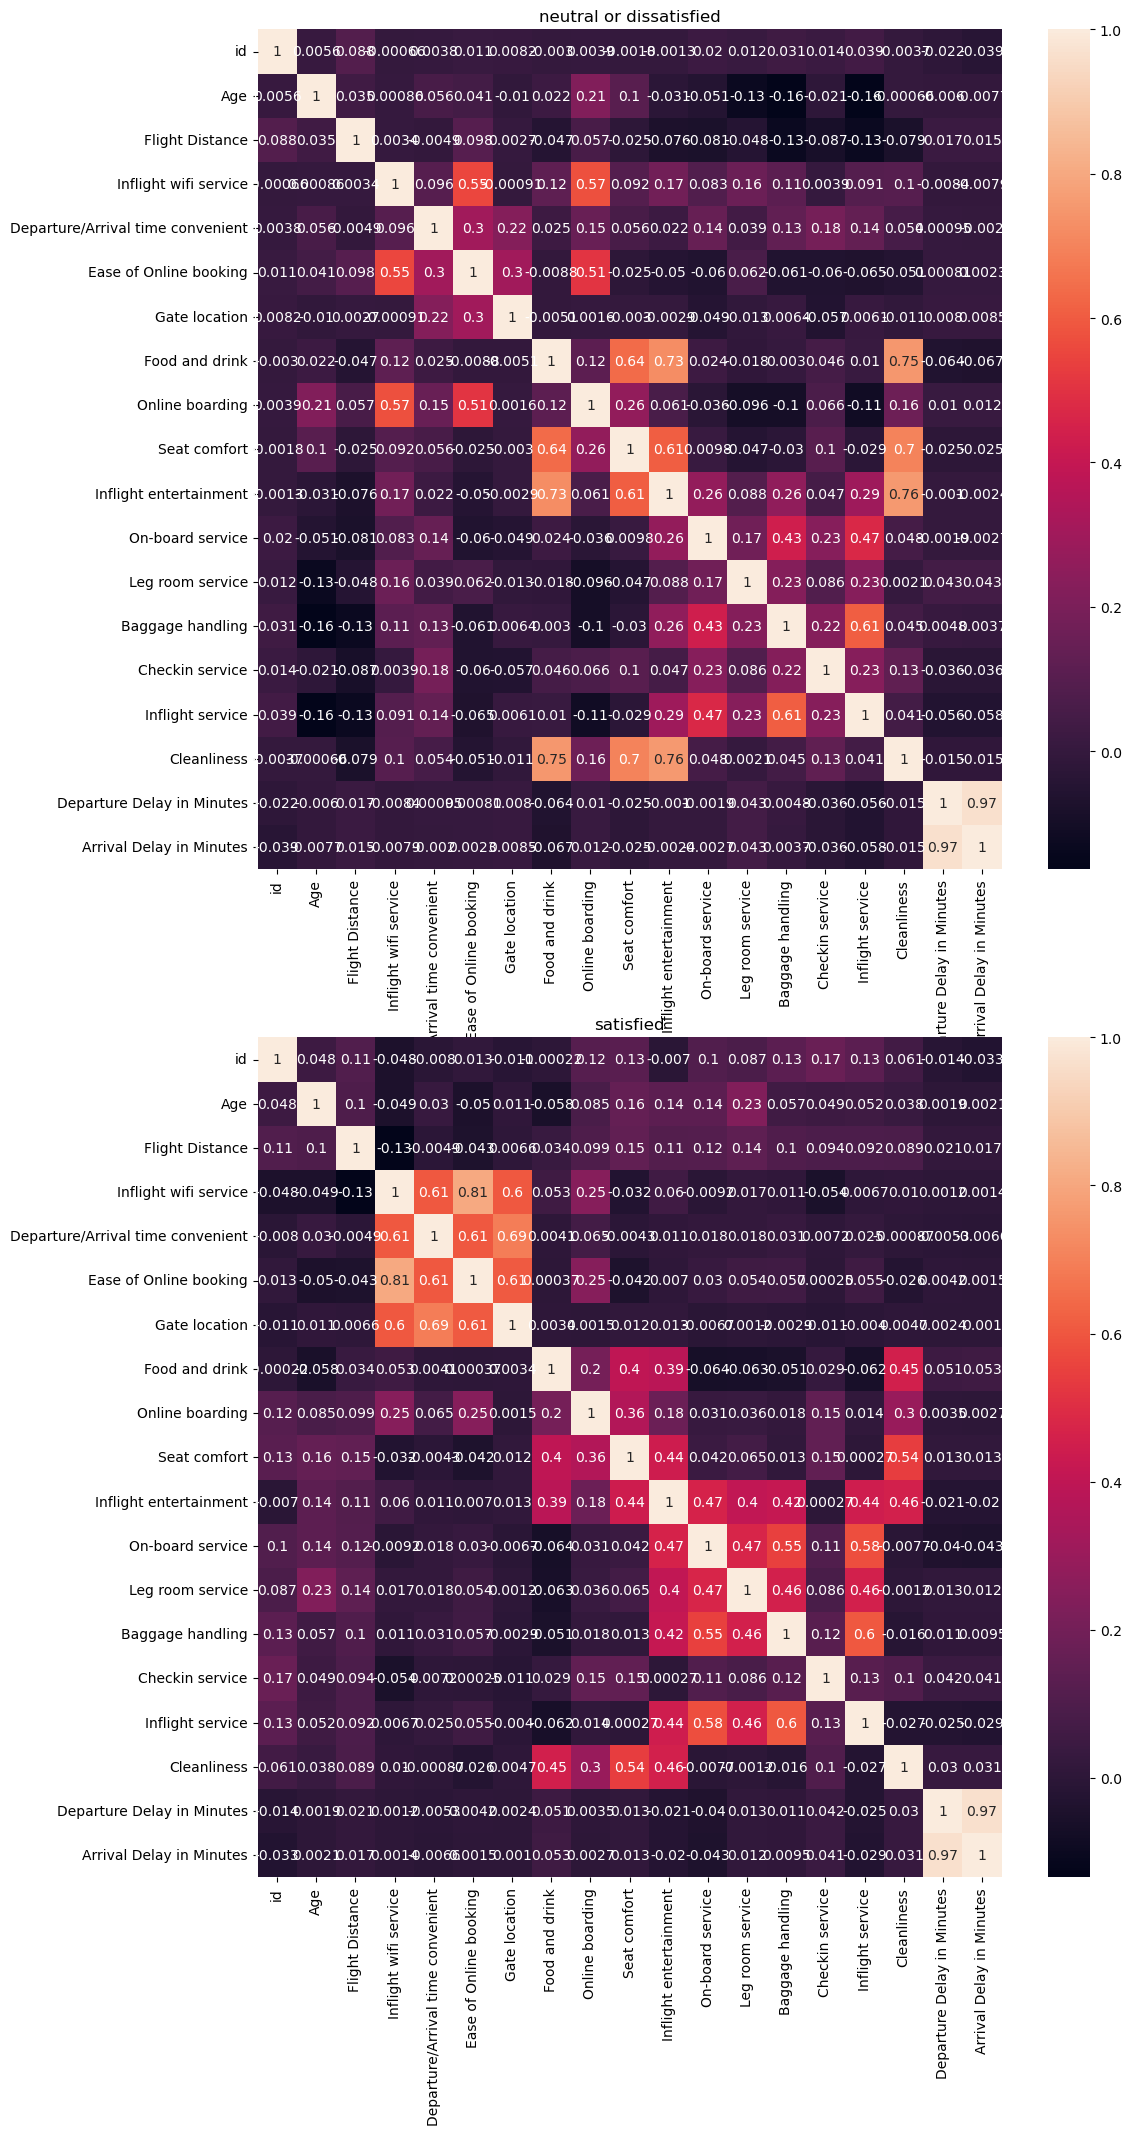

In [12]:
fig, axs = plt.subplots(2,figsize = (12,24))
count = 0
for feature in df['satisfaction'].unique():
    sns.heatmap(df[df['satisfaction'] == feature].select_dtypes(np.number).corr(), ax = axs[count], annot = True)
    axs[count].set_title('{}'.format(feature))
    print('\n')
    count = count + 1

   For better visualization, we must create another column with the feature 'class', which will hold the binary value for either satisfied or neutral or dissatisfied. 

In [11]:
df['class'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

<AxesSubplot:>

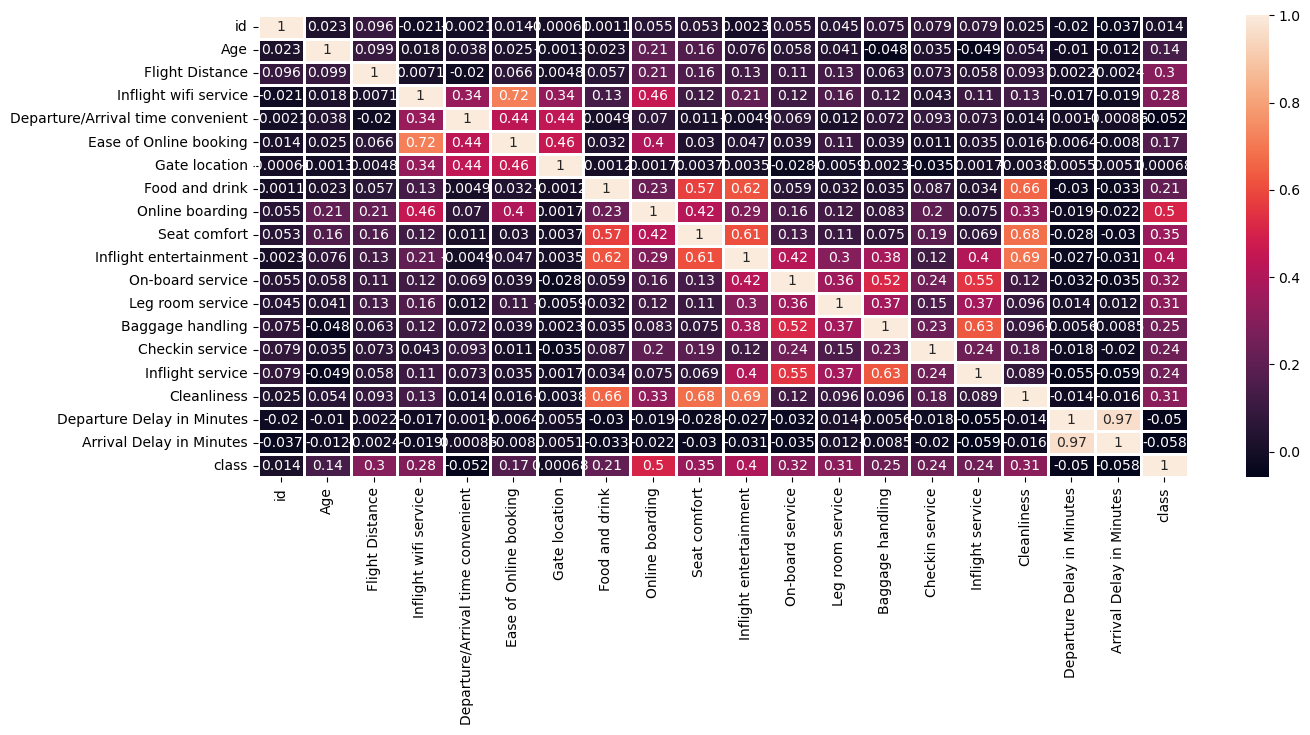

In [15]:
plt.figure(figsize = (15, 6))
sns.heatmap(df.select_dtypes(np.number).corr(), linewidth = 1, annot = True)

Checking the row 'class', we see that a client's satisfaction is somewhat highly correlated to both Online Boarding, Seat Comfort and Inflight entertainment. 

Before we go further, we will have to exclude the 'NaN' values from the data, if there is any.

In [16]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
class           

In [17]:
(310/df['Arrival Delay in Minutes'].count()) * 100

0.29924513002683556

 Since the cases in which there are only 310 categories which hold the 'NaN' value(~0.30%), it is precisely fine to drop out the rows in which they are in, because it won't affect much the result of training and test data. 

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
class                                0
dtype: int64

In [20]:
df['Arrival Delay in Minutes'].unique()

array([1.800e+01, 6.000e+00, 0.000e+00, 9.000e+00, 2.300e+01, 8.000e+00,
       3.500e+01, 5.100e+01, 1.000e+01, 5.000e+00, 4.000e+00, 2.900e+01,
       4.400e+01, 2.800e+01, 1.200e+01, 1.200e+02, 2.400e+01, 1.000e+00,
       2.000e+01, 3.100e+01, 1.500e+01, 4.800e+01, 2.600e+01, 4.900e+01,
       2.000e+00, 3.700e+01, 5.000e+01, 3.000e+00, 1.900e+01, 7.200e+01,
       1.100e+01, 3.400e+01, 6.200e+01, 2.700e+01, 5.200e+01, 1.300e+01,
       8.200e+01, 3.000e+01, 1.600e+01, 7.000e+00, 1.220e+02, 1.790e+02,
       1.250e+02, 1.700e+01, 8.900e+01, 1.010e+02, 1.400e+01, 6.100e+01,
       3.200e+01, 3.300e+01, 4.100e+01, 1.910e+02, 1.380e+02, 5.300e+01,
       2.200e+01, 5.700e+01, 6.500e+01, 7.600e+01, 1.070e+02, 9.200e+01,
       1.640e+02, 2.100e+01, 4.000e+01, 5.500e+01, 1.850e+02, 6.300e+01,
       7.700e+01, 8.600e+01, 9.100e+01, 1.000e+02, 5.400e+01, 3.600e+01,
       7.000e+01, 1.390e+02, 6.700e+01, 1.630e+02, 1.280e+02, 1.800e+02,
       9.300e+01, 1.210e+02, 4.500e+01, 1.050e+02, 

    Let's plot a countplot, based on Online Boarding x Class.

<AxesSubplot:xlabel='Online boarding', ylabel='count'>

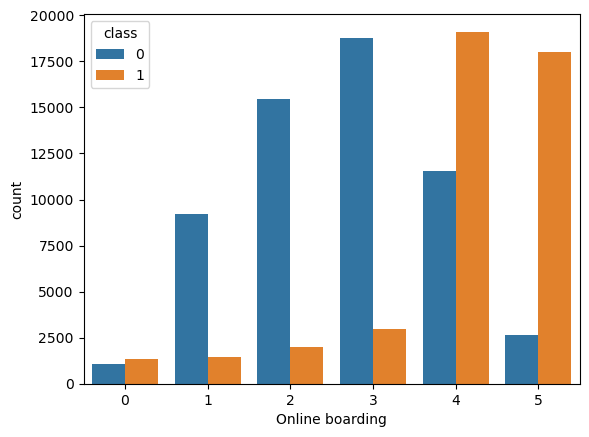

In [21]:
sns.countplot(data = df, x = 'Online boarding', hue = 'class')

        From what we can see, a satisfied score is intrinsically attached to 4-5ish online boarding scores. Let's dig further into that idea.

In [22]:
df[(df['Online boarding'] == 4) & (df['class'] == 1)]['Online boarding'].count()

19109

In [23]:
df[(df['Online boarding'] == 5) & (df['class'] == 1)]['Online boarding'].count()

18004

     As seen on the code above, it's clear that the value of the Online boarding '4' satifies more than the Online boarding of '5', however, why is that? For this, let's check the correlation of the 4, with the features Seat Comfort and Inflight entertainment. 

In [24]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'class'],
      dtype='object')

In [25]:
df.select_dtypes(include = np.number).corr()['Online boarding'][['Seat comfort', 'Inflight entertainment']]

Seat comfort              0.420067
Inflight entertainment    0.285194
Name: Online boarding, dtype: float64

In [26]:
y = []
X = df['Online boarding'].unique()
count = 1
for value in range(len(X) - 1) :
    y.append(df[df['Online boarding'] == value].groupby("Seat comfort").count()['id'][count])
    count = count + 1

print(y)

[428, 1991, 3362, 4957, 8141]


    Let's check, visually, the amount of online boarding per seat comfort, preferrably, in percentage.

Text(0, 0.5, 'Percentage of Total Online Boarding (%)')

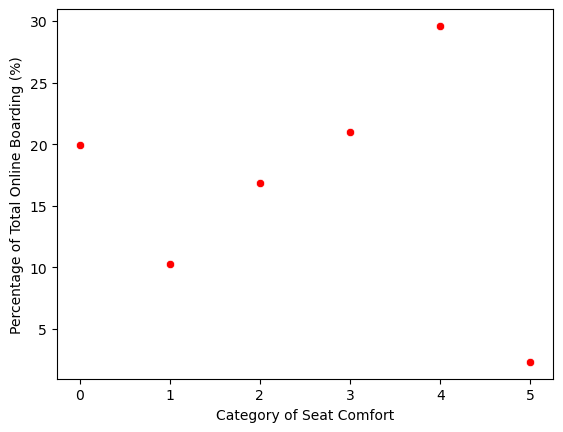

In [27]:
X = df['Seat comfort'].unique()
y = []

for count in range(len(X)):
    y.append(len(df[df['Online boarding'] == count]['Online boarding'])/len(df['Online boarding']) * 100)
    
sns.scatterplot(x = X, y = y, color = 'red')
plt.xlabel("Category of Seat Comfort")
plt.ylabel("Percentage of Total Online Boarding (%)")

      Alright, from this point we confirm the high correlation of Online boarding with Seat Comfort. From now on, we've gotten two positive relations with the feature 'class', we could also add the feature 'Inflight entertainment' if is convinient to our model. To have a better accuracy and counterbalance, we cannot use StandardScaler from sklearn on this case, as most of the data into our data set is mainly numerically categorical. 

    Because of this, we will have a different approach, allowing us to counterbalance the stats, we'll need to check the relations of the 'class' features, with its negative counter parts. 
        To further understand this, we will need to see the relations of 'loyal' and 'disloyal' customers, age of the customer, also it'd be good to separate the informations with the Gender criteria, there could be a weird pattern between those three labels, leading us to a different approach when dealing with the negative correlations of the 'class' feature. 

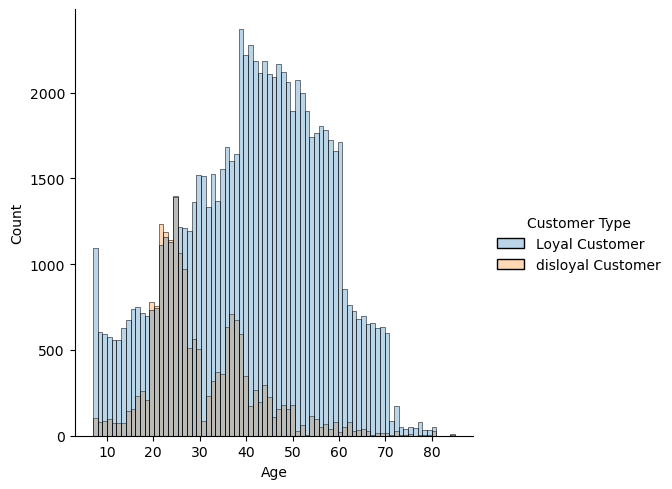

In [28]:
sns.displot(data = df, x = 'Age', hue = 'Customer Type', alpha = 0.3)

    To be clearer, let's do the gender counterpart by the scatter plot

<AxesSubplot:xlabel='Age', ylabel='Arrival Delay in Minutes'>

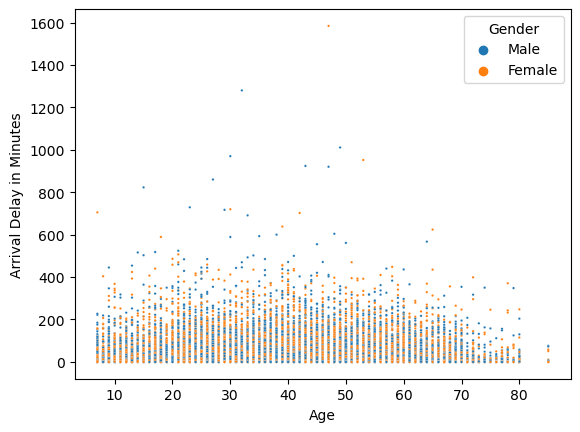

In [29]:
sns.scatterplot(data = df, x = 'Age', y = 'Arrival Delay in Minutes', hue =  "Gender", s = 3)

    This data looks non-linear and well-distributed for both Male and Female. Nothing really important.

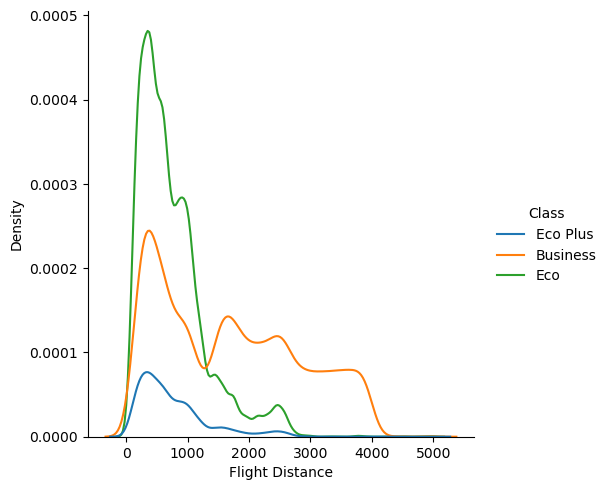

In [30]:
sns.displot(data = df, x = 'Flight Distance', hue = 'Class', kind = 'kde')

 

    Okay, this gave us an idea of how to train our model. We'll be using Multi-Layer Perceptron, as it could be a better predictor, and it's flexible, allowing us to change the number of nodes, hidden layers,ebochs and  activation functions to improve our system. Because of this, it's not necessary to show all the testing and training on this project, and indeed only the final product number of nodes, and compilation.
    
    The features we'll be using are:  'Age, Flight Distance, Seat Comfort and Online Boarding'. Let's start!

In [97]:
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Activation, Dropout
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'class'],
      dtype='object')

In [84]:
X = df[['Age',  'Flight Distance', 'Online boarding', 'Seat comfort']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)


In [85]:
model = Sequential()

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [86]:
model.fit(x = X_train, y = y_train , validation_data = (X_test, y_test), epochs = 200, batch_size = 30)

Epoch 1/200
2425/2425 [==============================] - 5s 2ms/step - loss: 1.5102 - accuracy: 0.5796 - val_loss: 1.6886 - val_accuracy: 0.5758
Epoch 2/200
2425/2425 [==============================] - 5s 2ms/step - loss: 0.9475 - accuracy: 0.6534 - val_loss: 1.2435 - val_accuracy: 0.5949
Epoch 3/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.7771 - accuracy: 0.6877 - val_loss: 0.7799 - val_accuracy: 0.6969
Epoch 4/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.6769 - accuracy: 0.7167 - val_loss: 0.7757 - val_accuracy: 0.6818
Epoch 5/200
2425/2425 [==============================] - 5s 2ms/step - loss: 0.5945 - accuracy: 0.7410 - val_loss: 0.5072 - val_accuracy: 0.7856
Epoch 6/200
2425/2425 [==============================] - 6s 3ms/step - loss: 0.5752 - accuracy: 0.7457 - val_loss: 0.5581 - val_accuracy: 0.7502
Epoch 7/200
2425/2425 [==============================] - 6s 2ms/step - loss: 0.5452 - accuracy: 0.7551 - val_loss: 0.6121 - val_ac

2425/2425 [==============================] - 4s 2ms/step - loss: 0.4113 - accuracy: 0.8172 - val_loss: 0.4096 - val_accuracy: 0.8185
Epoch 114/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4149 - accuracy: 0.8149 - val_loss: 0.4143 - val_accuracy: 0.8141
Epoch 115/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4156 - accuracy: 0.8149 - val_loss: 0.4141 - val_accuracy: 0.8161
Epoch 116/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4136 - accuracy: 0.8161 - val_loss: 0.4164 - val_accuracy: 0.8209
Epoch 117/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4138 - accuracy: 0.8153 - val_loss: 0.4456 - val_accuracy: 0.8081
Epoch 118/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4131 - accuracy: 0.8159 - val_loss: 0.4191 - val_accuracy: 0.8159
Epoch 119/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4109 - accuracy: 0.8181 - val_loss: 0.4160 - val_ac

Epoch 169/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4079 - accuracy: 0.8197 - val_loss: 0.4070 - val_accuracy: 0.8243
Epoch 170/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4076 - accuracy: 0.8201 - val_loss: 0.4032 - val_accuracy: 0.8270
Epoch 171/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4064 - accuracy: 0.8193 - val_loss: 0.4102 - val_accuracy: 0.8184
Epoch 172/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4072 - accuracy: 0.8202 - val_loss: 0.4055 - val_accuracy: 0.8232
Epoch 173/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4074 - accuracy: 0.8181 - val_loss: 0.4133 - val_accuracy: 0.8172
Epoch 174/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4073 - accuracy: 0.8197 - val_loss: 0.4047 - val_accuracy: 0.8265
Epoch 175/200
2425/2425 [==============================] - 4s 2ms/step - loss: 0.4073 - accuracy: 0.8190 - val_loss: 0

In [16]:
model.predict(X_test)

975/975 [==============================] - 1s 817us/step


array([[0.35453388],
       [0.49842113],
       [0.48094708],
       ...,
       [0.8416326 ],
       [0.8543506 ],
       [0.9903413 ]], dtype=float32)

0.7128607630729675


     Let's test the accuracy of this model, and later on insert even more categorical data to see if we have an improvement from the standard model.

In [18]:
df2 = pd.read_csv('test.csv')

In [198]:
df2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [199]:
df2[df2['Age'] == 52][0:5]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
14,14,2274,Female,Loyal Customer,52,Business travel,Business,925,2,2,...,4,4,4,4,3,4,5,10,0.0,satisfied
17,17,17836,Male,Loyal Customer,52,Personal Travel,Eco Plus,1075,5,4,...,4,3,5,5,4,5,4,0,0.0,satisfied
95,95,88853,Female,Loyal Customer,52,Personal Travel,Eco Plus,406,3,4,...,2,2,3,2,3,2,4,0,0.0,neutral or dissatisfied
226,226,110384,Female,Loyal Customer,52,Business travel,Eco,919,3,4,...,3,3,3,3,1,3,1,85,72.0,neutral or dissatisfied


In [19]:
model.predict(df2[df2['Age'] == 28][['Age',  'Flight Distance', 'Online boarding', 'Seat comfort']][0:5])

1/1 [==============================] - 0s 20ms/step


array([[0.77852416],
       [0.03411686],
       [0.05224258],
       [0.9835824 ],
       [0.66985   ]], dtype=float32)

In [81]:
df2[df2['Age'] == 20][0:5]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
114,114,54444,Male,Loyal Customer,20,Personal Travel,Eco Plus,305,3,4,...,1,3,3,4,4,5,1,5,2.0,neutral or dissatisfied
169,169,106220,Female,disloyal Customer,20,Business travel,Eco,471,4,5,...,3,4,3,4,5,4,3,0,0.0,neutral or dissatisfied
196,196,75522,Female,disloyal Customer,20,Business travel,Eco,337,4,0,...,4,3,5,4,4,5,4,0,0.0,satisfied
250,250,108010,Male,disloyal Customer,20,Business travel,Business,271,0,0,...,1,5,4,4,4,4,1,0,0.0,satisfied


In [20]:
model.predict(df2[df2['Age'] == 20][['Age',  'Flight Distance', 'Online boarding', 'Seat comfort']][0:5])

1/1 [==============================] - 0s 20ms/step


array([[0.02919747],
       [0.05509564],
       [0.46083486],
       [0.4530143 ],
       [0.62901515]], dtype=float32)

In [21]:
model.predict(df2[df2['Age'] == 33][['Age',  'Flight Distance', 'Online boarding', 'Seat comfort']][0:5])

1/1 [==============================] - 0s 19ms/step


array([[0.17923293],
       [0.5874025 ],
       [0.07864288],
       [0.5672812 ],
       [0.99261725]], dtype=float32)

In [22]:
df2[df2['Age'] == 33][0:5]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
11,11,115550,Female,Loyal Customer,33,Business travel,Business,325,2,5,...,2,2,2,2,3,2,4,18,7.0,neutral or dissatisfied
232,232,111696,Male,Loyal Customer,33,Business travel,Business,541,2,2,...,4,5,2,5,3,4,4,86,85.0,satisfied
245,245,123927,Male,Loyal Customer,33,Personal Travel,Eco,646,2,4,...,3,4,1,3,2,5,3,1,0.0,neutral or dissatisfied
272,272,107606,Male,disloyal Customer,33,Business travel,Business,423,4,4,...,4,3,2,4,5,5,4,0,5.0,neutral or dissatisfied
445,445,29829,Male,Loyal Customer,33,Business travel,Business,3679,2,2,...,5,3,3,5,2,2,5,0,0.0,satisfied


In [23]:
model.predict(df2[df2['Age'] == 24][['Age',  'Flight Distance', 'Online boarding', 'Seat comfort']][0:5])

1/1 [==============================] - 0s 26ms/step


array([[0.35940298],
       [0.45626497],
       [0.42581147],
       [0.11169533],
       [0.48556948]], dtype=float32)

In [25]:
loss, acc = model.evaluate(X_test, y_test)

975/975 [==============================] - 1s 1ms/step - loss: 0.4064 - accuracy: 0.8190


In [28]:
print(acc)

0.8190363049507141


In [88]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(np.where(model.predict(X_test) >= 0.5, 1,0), y_test))

975/975 [==============================] - 1s 838us/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     17160
           1       0.81      0.78      0.80     14012

    accuracy                           0.82     31172
   macro avg       0.82      0.82      0.82     31172
weighted avg       0.82      0.82      0.82     31172



In [42]:
df2['class'] = df2['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

812/812 [==============================] - 1s 893us/step


<AxesSubplot:>

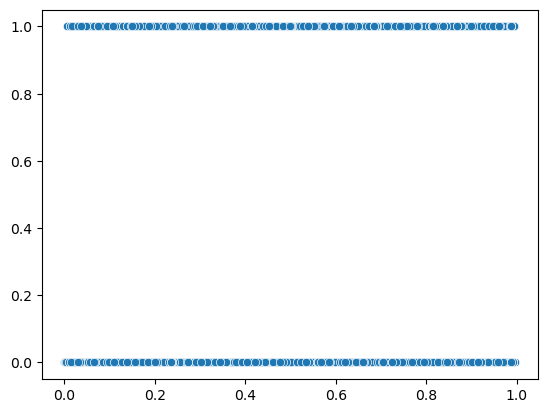

In [49]:
X = np.array(model.predict(df2[['Age',  'Flight Distance', 'Online boarding', 'Seat comfort']]))
y = np.array(df2['class'])
sns.scatterplot(x = X.flatten(), y = y.flatten())

In [89]:
print(classification_report(np.where(model.predict(df2[['Age',  'Flight Distance', 'Online boarding', 'Seat comfort']]) >= 0.5, 1, 0), df2['class']))
print('\n')
print(confusion_matrix(np.where(model.predict(df2[['Age',  'Flight Distance', 'Online boarding', 'Seat comfort']]) >= 0.5, 1, 0), df2['class']))


812/812 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.82      0.85      0.84     14088
           1       0.81      0.78      0.80     11888

    accuracy                           0.82     25976
   macro avg       0.82      0.82      0.82     25976
weighted avg       0.82      0.82      0.82     25976



812/812 [==============================] - 1s 871us/step
[[11975  2113]
 [ 2598  9290]]


        This was the standard model, and that's the proof that our model works with no overfitting. Now the idea is to see if we can improve this model with all the parameters (numerically ones)

In [96]:
X = df.select_dtypes(include = np.number).drop('class', axis = 1)
y = df['class']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.35) 

model2 = Sequential()
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units =  128, activation = 'relu'))
model2.add(Dense(units = 1, activation = 'sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.fit(x = X_train2, y = y_train2 , validation_data  =(X_test2, y_test2), epochs = 200, batch_size = 3000)

Epoch 1/600
23/23 [==============================] - 8s 15ms/step - loss: nan - accuracy: 0.5588 - val_loss: nan - val_accuracy: 0.5681
Epoch 2/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 3/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 4/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 5/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 6/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 7/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 8/600
23/23 [==============================] - 0

23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 62/600
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 63/600
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 64/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 65/600
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 66/600
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 67/600
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 68/600
23/23 [==============================] - 0s 8ms/

23/23 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 122/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 123/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 124/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 125/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 126/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 127/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 128/600
23/23 [==============================] -

Epoch 181/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 182/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 183/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 184/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 185/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 186/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 187/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 188/600
23/23 [====================

Epoch 241/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 242/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 243/600
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 244/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 245/600
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 246/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 247/600
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 248/600
23/23 [====================

Epoch 301/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 302/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 303/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 304/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 305/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 306/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 307/600
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 308/600
23/23 [====================

Epoch 361/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 362/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 363/600
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 364/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 365/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 366/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 367/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 368/600
23/23 [====================

Epoch 421/600
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 422/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 423/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 424/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 425/600
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 426/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 427/600
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 428/600
23/23 [====================

Epoch 481/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 482/600
23/23 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 483/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 484/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 485/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 486/600
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 487/600
23/23 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.5659 - val_loss: nan - val_accuracy: 0.5681
Epoch 488/600
23/23 [==================

KeyboardInterrupt: 

        However, more parameters didn't necessarily improve the model. That's why it's important to study the data and make some data analysis from it. In this particular data set, there were lots of categorical data, that's why, placing more and more of them could lead to an overfitting of the model.

        This is the end of this project, from understanding the behaviour of the customer, it's possible to minimize the high values on products, or also improve the service just by a bit, so they get to be 'satisfied' and company gets more profit out of it, and have a higher chance of them returning more often.